In [0]:
from sklearn.datasets import load_iris
from sklearn.metrics.pairwise import cosine_similarity
from scipy.misc import imshow
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt


In [0]:
## Load Iris data and seperate it into data and labels.
iris = load_iris()
X = iris.data
Y = iris.target
X_columns = iris.feature_names
Y_labels = iris.target_names
iris_description = iris.DESCR


In [0]:
## Calculate Similarity Matrix
similarity = cosine_similarity(X,X)

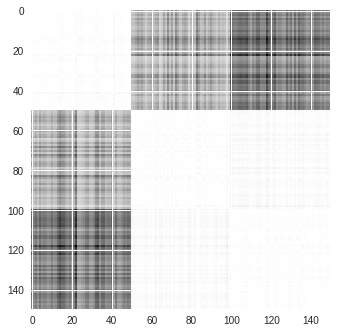

In [0]:
## Scikit imshow not working on colab,

#imshow(similarity)

## Just making similarities be white so it is clearer in plot(Done 
## Implicitly when using scipy imshow).
plt.imshow(1 - similarity)
plt.show()

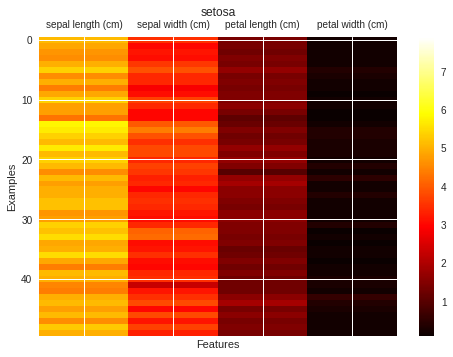

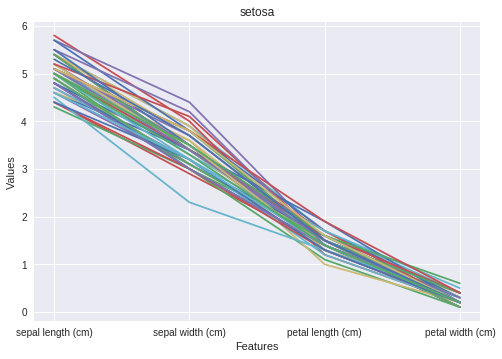

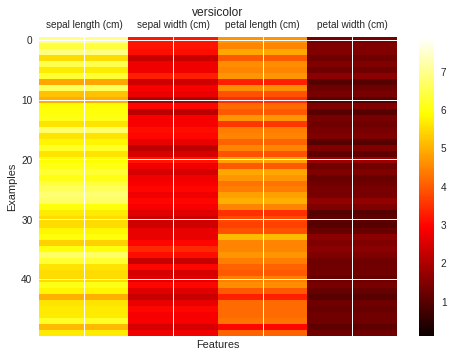

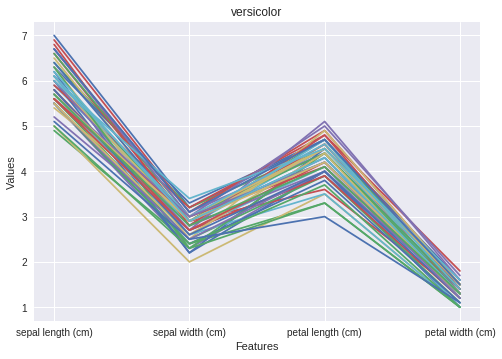

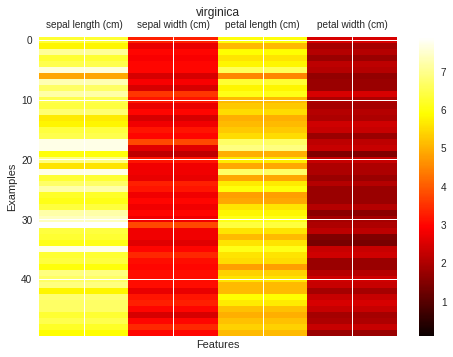

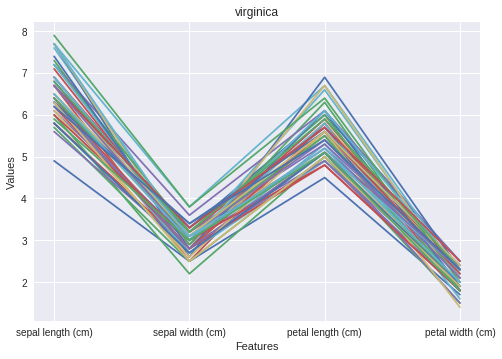

In [0]:
## Plot X for each class seperatly as a matrix plot.
class_jump = 50
min_val = np.min(X)
max_val = np.max(X)
for i in range(Y_labels.shape[0]):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(X[i * class_jump : (i + 1) * class_jump, :],
                   cmap = 'hot',
                   interpolation='nearest',
                   aspect='auto',
                   vmin=min_val, vmax=max_val)
  fig.colorbar(cax)
  plt.title(Y_labels[i])
  ax.set_xticklabels(['']+X_columns)
  plt.xlabel('Features')
  plt.ylabel('Examples')
  plt.show()
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  plt.title(Y_labels[i])
  plt.plot(np.arange(len(X_columns)),
           X[i * class_jump : (i + 1) * class_jump, :].T)
  plt.xticks(np.arange(len(X_columns)), X_columns)
  plt.xlabel('Features')
  plt.ylabel('Values')
  plt.show()

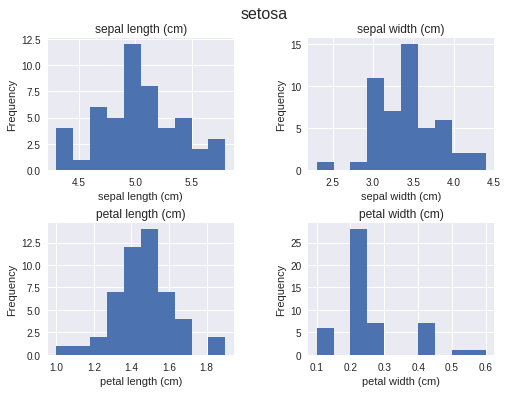

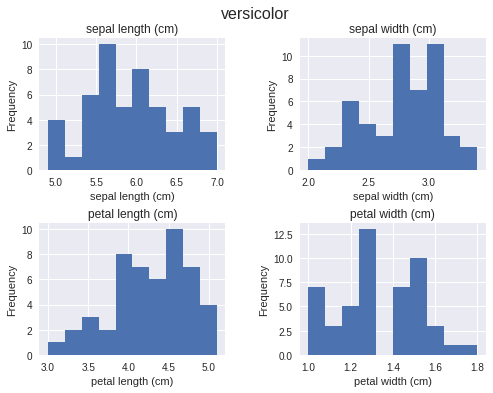

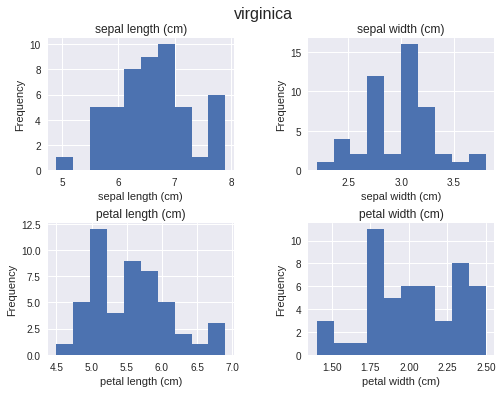

In [0]:
## Do histograms for each class for each feature
class_jump = 50
bin_number = 10
for i in range(Y_labels.shape[0]):
  fig = plt.figure()
  fig.suptitle(Y_labels[i], fontsize = 16)
  for j in range(len(X_columns)):
    ax = fig.add_subplot(2, 2, j + 1)
    ax.set_title(X_columns[j])
    ax.hist(X[i * class_jump : (i + 1) * class_jump, j], bins = bin_number)
    ax.set_xlabel(X_columns[j])
    ax.set_ylabel('Frequency')
  fig.subplots_adjust(left=0.125, bottom=0.1,
                      right=0.9, top=0.9,
                      wspace=0.4, hspace=0.4)  
  plt.show()

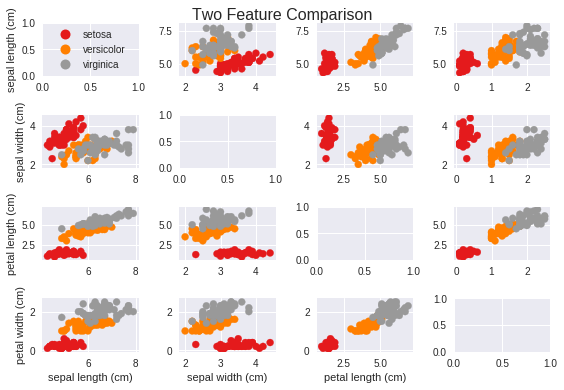

In [0]:
## Comparing feature pairs.
feature_number = len(X_columns)
fig, axes = plt.subplots(nrows = feature_number, ncols = feature_number)
fig.suptitle('Two Feature Comparison', fontsize = 16)
for i in range(feature_number):
  ax = axes[i, 0]
  ax.set_ylabel(X_columns[i])
  for j in range(feature_number):
    if (i != j):
      index = (i) * feature_number + (j + 1)
      ax = axes[i, j]
      ax.scatter(X[:,j], X[:, i], c = Y, cmap=plt.cm.Set1, label = Y_labels[Y])
      if (i == feature_number - 1):
        ax.set_xlabel(X_columns[j])
legend_elements = [ Line2D([0], [0], marker='o', color=plt.cm.Set1(0),
                           label=Y_labels[0], markerfacecolor=plt.cm.Set1(0),
                           markersize=10, linestyle = 'None'),
                  Line2D([0], [0], marker='o', color=plt.cm.Set1(0.5),
                         label=Y_labels[1], markerfacecolor=plt.cm.Set1(0.5),
                         markersize=10, linestyle = 'None'),
                  Line2D([0], [0], marker='o', color=plt.cm.Set1(0.9),
                         label=Y_labels[2], markerfacecolor=plt.cm.Set1(0.9),
                         markersize=10, linestyle = 'None')]
axes[0,0].legend(handles = legend_elements,
                 labels = Y_labels.tolist(),
                 loc = 'center')
fig.tight_layout()
plt.show()

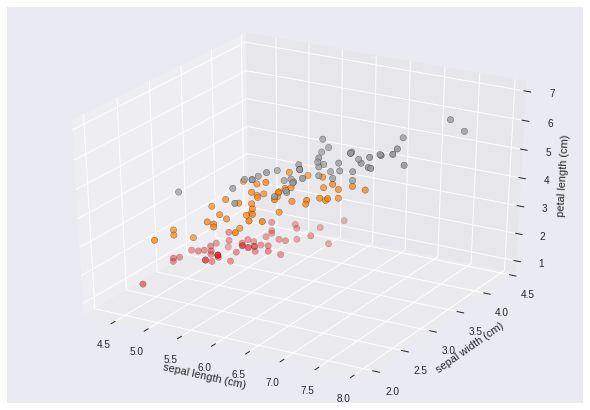

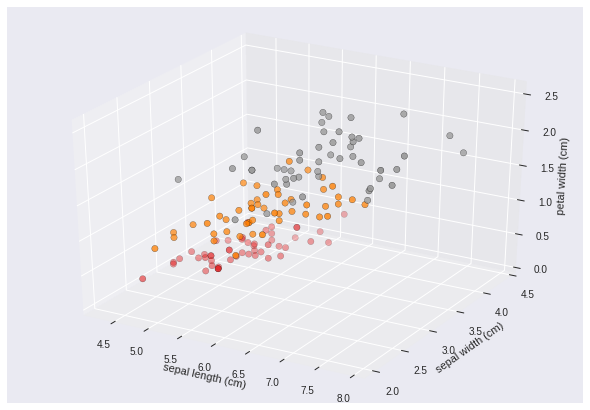

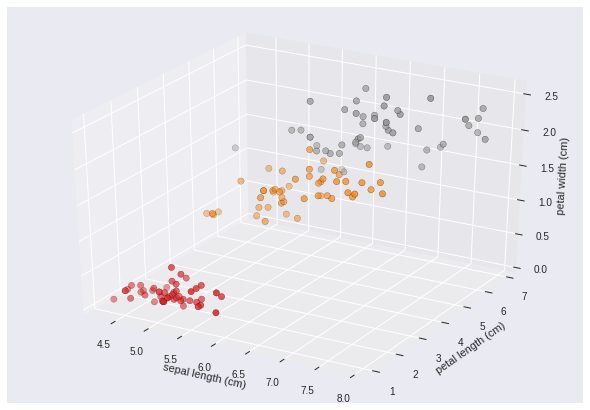

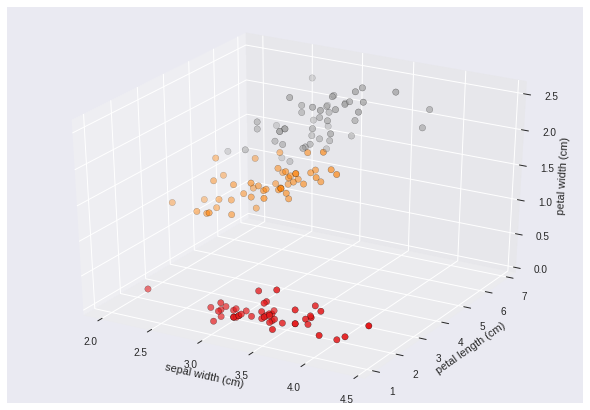

In [0]:
for i in range(len(X_columns)):
  for j in range(i+1, len(X_columns)):
    for k in range(j+1, len(X_columns)):
      fig = plt.figure()
      ax = Axes3D(fig)
      axe = ax.scatter(X[:, i], X[:, j], X[:, k],
                       c=Y,
                       cmap=plt.cm.Set1,
                       edgecolor='k',
                       s=40)
      ax.set_xlabel(X_columns[i])
      ax.set_ylabel(X_columns[j])
      ax.set_zlabel(X_columns[k])
      plt.show()